In [38]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
df = pd.read_csv('zomato.csv',encoding = 'latin-1')

In [40]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [41]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [43]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# In data analysis what all things we do

1.   Missing values
2.   Explore numerical variables
3.   Explore about categorical variables
4.   Finding relationships between features



In [44]:
# missing values
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [45]:
# check missing values by list comprehension
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

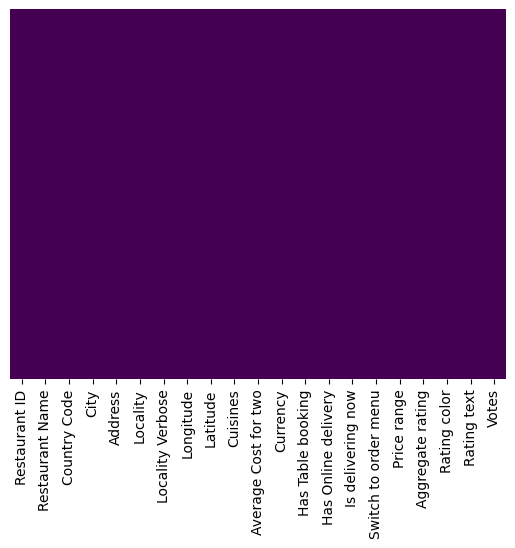

In [46]:
# missing values through heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
# merge 2 dataset on a common column
# how -- in which dataset we have to merge, here left means merge in df1 in df

# pd.merge(df,df1,on='column_name',how='left')

In [48]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [49]:
# check datatypes
df.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [50]:
# Exploring
df['Country Code'].value_counts()

,count
Country Code,
1,8652
216,434
215,80
30,60
189,60
214,60
148,40
208,34
14,24


In [51]:
# storing key names
country_names = df['Country Code'].value_counts().index

In [52]:
# storing values to the corresponding keys
country_val = df['Country Code'].value_counts().values

[]

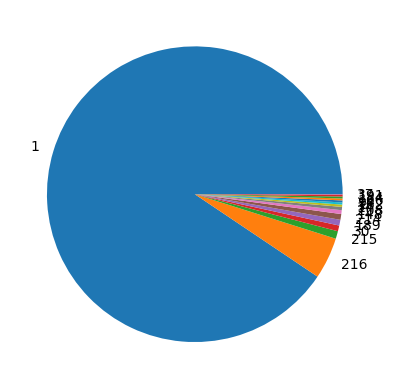

In [53]:
# pie chart
plt.pie(country_val,labels=country_names)
plt.plot()

[]

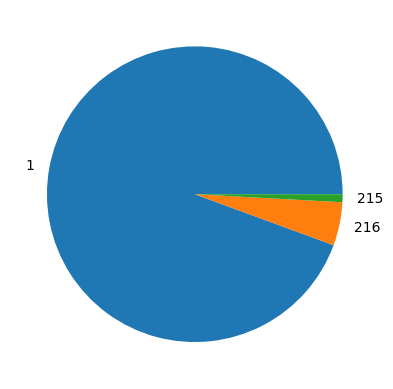

In [54]:
# top 3 countries that use zomato
plt.pie(country_val[:3],labels=country_names[:3])
plt.plot()

In [55]:
ratings = df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [56]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

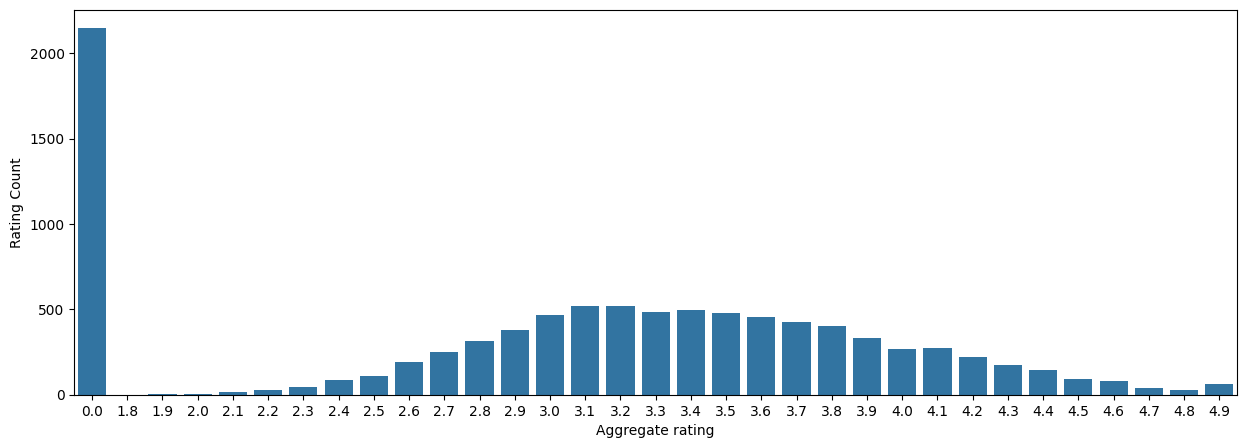

In [57]:
# barplot
fig = plt.figure(figsize=(15,5))
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

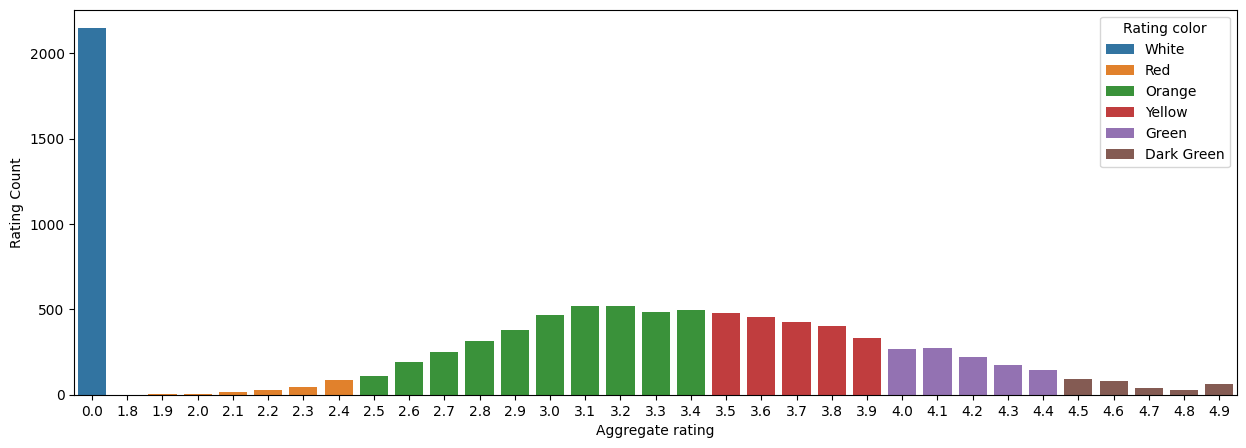

In [58]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x='Aggregate rating',y='Rating Count',hue='Rating color',data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

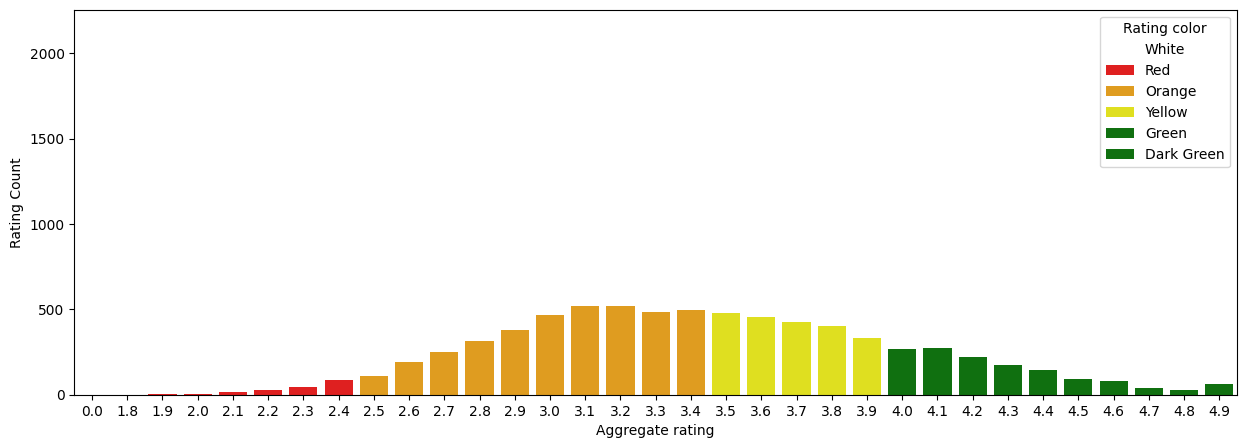

In [59]:
# mapping colors acc to dataset we use pallete and define our colors
fig = plt.figure(figsize=(15,5))
sns.barplot(x='Aggregate rating',y='Rating Count',hue='Rating color',data=ratings,palette=['white','red','orange','yellow','green','green'])

<ipython-input-60-8261b8a43a71>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating color',data=ratings,palette=['white','red','orange','yellow','green','green'])


<Axes: xlabel='Rating color', ylabel='count'>

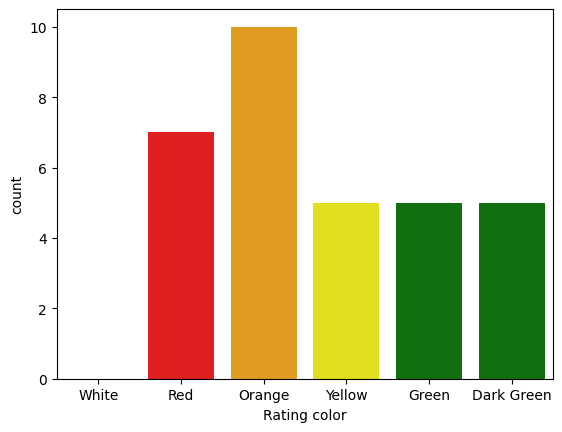

In [60]:
# count plot--- we use wrt to categorical variables
sns.countplot(x='Rating color',data=ratings,palette=['white','red','orange','yellow','green','green'])

In [61]:
df[df['Aggregate rating']==0.0]['Country Code'].value_counts()

,count
Country Code,
1,2139
30,5
216,3
215,1


In [62]:
# find country names which has given 0 rating
df[df['Rating color']=='White']['Country Code'].value_counts()

,count
Country Code,
1,2139
30,5
216,3
215,1


In [63]:
# Find out which currency is used by which country
df.groupby(['Country Code','Currency']).size().reset_index()

,Country Code,Currency,0
0,1,Indian Rupees(Rs.),8652
1,14,Dollar($),24
2,30,Brazilian Real(R$),60
3,37,Dollar($),4
4,94,Indonesian Rupiah(IDR),21
5,148,NewZealand($),40
6,162,Botswana Pula(P),22
7,166,Qatari Rial(QR),20
8,184,Dollar($),20
9,189,Rand(R),60


In [64]:
# which countries have online delivery options
df.groupby(['Has Online delivery','Country Code']).size().reset_index()

,Has Online delivery,Country Code,0
0,No,1,6229
1,No,14,24
2,No,30,60
3,No,37,4
4,No,94,21
5,No,148,40
6,No,162,22
7,No,166,20
8,No,184,20
9,No,189,60


In [65]:
df[df['Has Online delivery']=='Yes']['Country Code'].value_counts().reset_index()

,Country Code,count
0,1,2423
1,214,28


In [66]:
# create pie chart for city
city_val = df['City'].value_counts().values
city_val

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1])

In [67]:
city_name = df['City'].value_counts().index
city_name

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad', 'Lucknow',
       'Guwahati', 'Amritsar', 'Bhubaneshwar', 'Ahmedabad',
       ...
       'Forrest', 'Flaxton', 'Consort', 'Cochrane', 'Clatskanie',
       'Chatham-Kent', 'Bandung', 'Beechworth', 'Armidale', 'Balingup'],
      dtype='object', name='City', length=141)

([<matplotlib.patches.Wedge at 0x7a7d077e8a10>,
 [Text(-0.2501618674207579, 1.0711764747643402, 'New Delhi'),
  Text(-0.745121915719338, -0.8091930120278745, 'Gurgaon'),
  Text(-0.023335860702208486, -1.0997524437823665, 'Noida'),
  Text(0.4451062250173843, -1.0059226851258372, 'Faridabad'),
  Text(0.5344697170236794, -0.9614271275477035, 'Ghaziabad'),
  Text(0.5489550432957175, -0.9532304865247423, 'Lucknow'),
  Text(0.5620711022307091, -0.9455559613461045, 'Guwahati'),
  Text(0.5750798895062447, -0.9377009761568373, 'Amritsar'),
  Text(0.5879789223862543, -0.9296670300863097, 'Bhubaneshwar'),
  Text(0.6007657390813725, -0.9214556564186973, 'Ahmedabad'),
  Text(0.6131375319471077, -0.9132701500201403, 'Savannah'),
  Text(0.625100125752387, -0.9051242084843107, 'Rest of Hawaii'),
  Text(0.6369545100691332, -0.8968215832051494, 'Pocatello'),
  Text(0.6486986328151094, -0.888363711428944, 'Pensacola'),
  Text(0.6603304609951781, -0.8797520572763077, 'Orlando'),
  Text(0.6718479810532302,

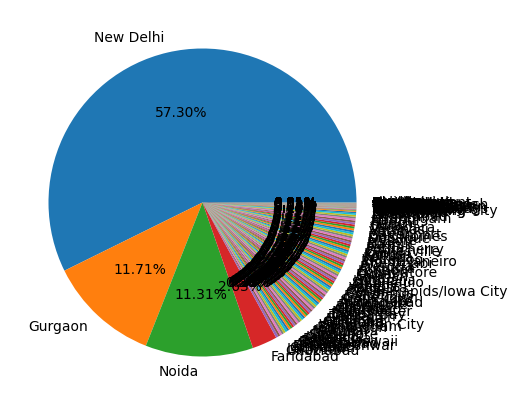

In [68]:
fig = plt.figure(figsize=(15,5))
plt.pie(city_val,labels=city_name,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7a7d0762e950>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

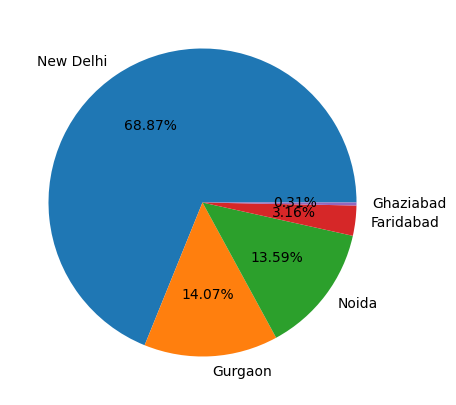

In [69]:
fig = plt.figure(figsize=(15,5))
plt.pie(city_val[:5],labels=city_name[:5],autopct='%1.2f%%')


In [70]:
# find top 10 cuisines
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [71]:
df['Cuisines'].value_counts()

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Fast Food,354
Chinese,354
"North Indian, Mughlai",334
...,...
"Kebab, Izgara",1
World Cuisine,1
"World Cuisine, Mexican, Italian",1


In [72]:
cuisine_name = df['Cuisines'].value_counts().index

In [73]:
cuisine_val = df['Cuisines'].value_counts().values

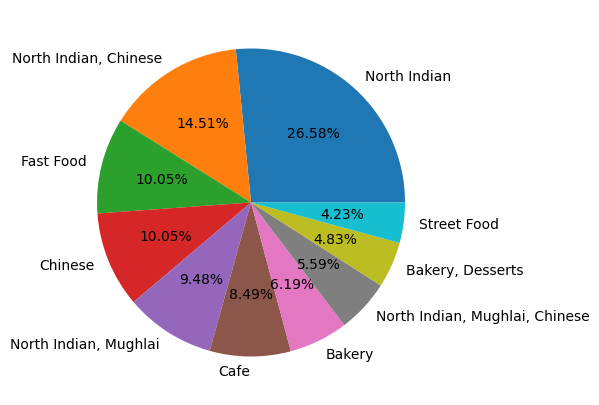

In [74]:
fig = plt.figure(figsize=(15,5))
plt.pie(cuisine_val[:10],labels=cuisine_name[:10],autopct='%1.2f%%')
plt.show()